## Market Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
sns.set()
%matplotlib inline

In [2]:
## load the data

data = pd.read_csv('Market_segmentation.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [3]:
## satisfaction is a discrete variable and takes value of 1 to 10 based on how satisfied the customer is (self reported)
## brand loyalty: proxies like churn rate, retention rate, customer lifetime value
## in this dataset it was measured ----> number of purchaces per year+ other factors
## continuous data and ranges from -2.5 to 2.5



In [4]:
## plot the data

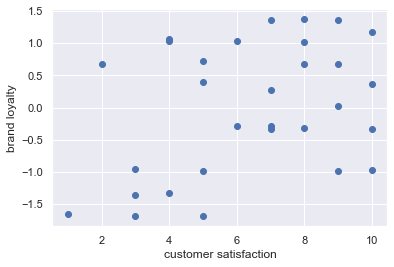

In [5]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('customer satisfaction')
plt.ylabel('brand loyalty')
plt.show()

In [6]:
## select the number of features

x = data.copy()

### Clustering

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [8]:
### clustering results

In [9]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

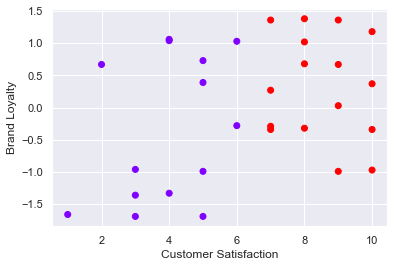

In [10]:
plt.scatter(x['Satisfaction'],x['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Brand Loyalty')
plt.show()

In [11]:
## problem: most probably the algorithm only considered satisfation as the feature
## KMeans more or less disregarded loyalty as the feature

### whenever we cluster on the basis of single variable the result looks like above 

## theres is a stong cutoff at satisfaction level 6, thus something fishy going around, 
## we should consider giving them equal weight

## because we did no standarized the variable-----


### customer satisfaction is in the range of 1-10
### brand loyalty is on the range of -2.5 to 2.5


### solution: let us standarize the variable

In [12]:
x['Loyalty'].describe()

count    30.000000
mean      0.001000
std       1.016476
min      -1.690000
25%      -0.967500
50%       0.150000
75%       0.947500
max       1.380000
Name: Loyalty, dtype: float64

### Standarization

In [13]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### using elbow method to choose optimum number of clusters

In [14]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit_predict(x_scaled)
    wcss.append(kmeans.inertia_)


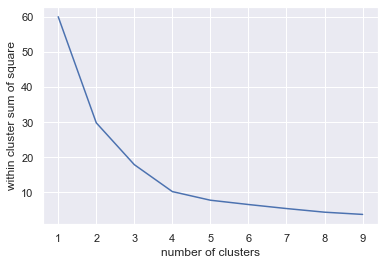

In [15]:
num_k = range(1,10)
plt.plot(num_k,wcss)
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of square')
plt.show()

#### using k=2 

In [16]:
x_copy = x
kmeans = KMeans(2)
predicted=kmeans.fit_predict(x_scaled)
x_copy['predicted']=predicted



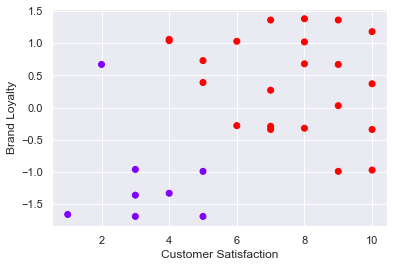

In [17]:
## plotting clusters with k=2 in the original unstandarized values

plt.scatter(x_copy['Satisfaction'],x_copy['Loyalty'],c=x_copy['predicted'],cmap='rainbow')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Brand Loyalty')
plt.show()

In [18]:
def generate_cluster(k):
    '''funciton that generates cluster based on the input parameter k'''
    x_copy = x
    kmeans = KMeans(k)
    predicted=kmeans.fit_predict(x_scaled)
    x_copy['predicted']=predicted
    plt.scatter(x_copy['Satisfaction'],x_copy['Loyalty'],c=x_copy['predicted'],cmap='rainbow')
    plt.xlabel('Customer Satisfaction')
    plt.ylabel('Brand Loyalty')
    plt.show()


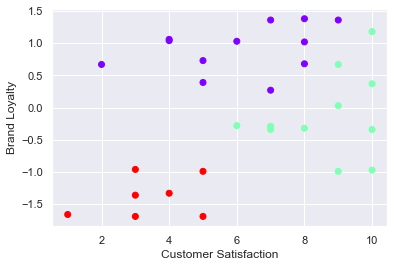

In [19]:
generate_cluster(3)

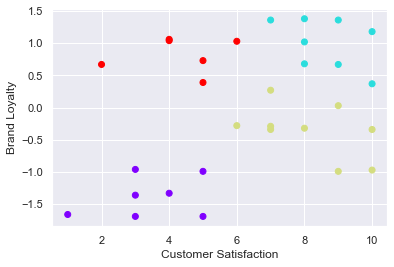

In [20]:
generate_cluster(4)

### Visualizing the data using dendogram and heatmap

In [23]:
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [27]:
data_copy = data
data_copy = preprocessing.scale(data_copy)
data_copy = pd.DataFrame(data_copy,columns=['Satisfaction','Loyalty'])
data_copy.head()

,Satisfaction,Loyalty
0,-0.931381,-1.331811
1,-0.155230,-0.281171
2,-0.543305,-0.991604
3,0.232845,-0.291177
4,-0.931381,1.059645


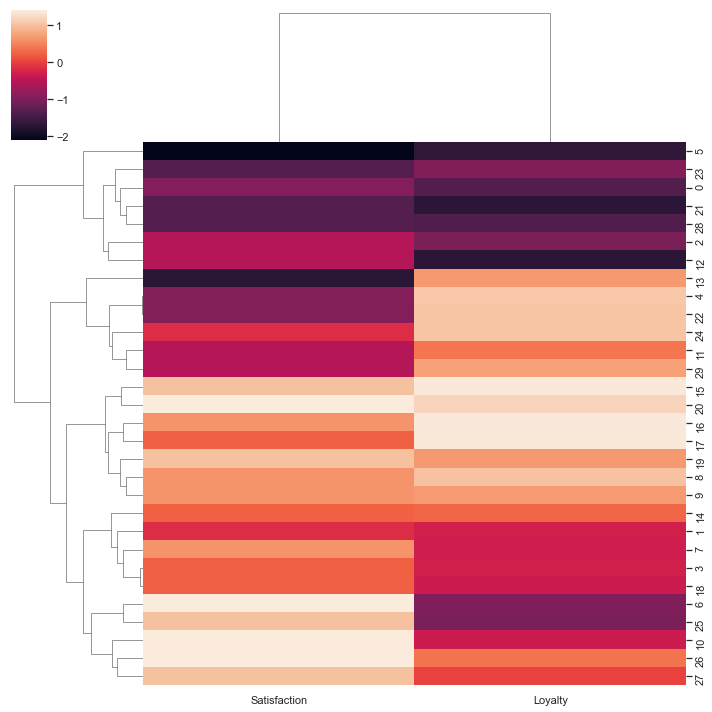

In [28]:
sns.clustermap(data_copy)